# Pendulum

The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    \tau
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the pendulum upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    \pi & 0
    \end{bmatrix}
\end{equation*}
$$

**Note**: The force is constrained between $-2.5$ and $2.5$ Nm.

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
N = 40  # Horizon length.
RENDER = True  # Whether to render the environment or not.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.pendulum.PendulumCost()
model = pddp.examples.pendulum.PendulumDynamicsModel(DT)
env = pddp.examples.pendulum.PendulumEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = model.constrain(U).detach().numpy()

    theta = np.unwrap(X[:, 0])  # Makes for smoother plots.
    theta_dot = X[:, 1]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (N m)")
    plt.title("Constrained action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[0] = (final_state[0] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200,
                      on_iteration=on_iteration)

iteration 8 accepted 458.9555 [0.28917432 0.3795962 ]
iteration 9 accepted 442.54102 [0.35850745 0.08300023]
iteration 10 accepted 415.25653 [0.8773578 0.1651631]
iteration 11 accepted 393.69678 [1.2656474  0.28007627]
iteration 12 accepted 349.47626 [1.7431207  0.39934623]
iteration 13 accepted 270.2918 [2.0288038  0.34150195]
iteration 14 accepted 227.58267 [2.337701   0.25743747]
iteration 15 accepted 211.43019 [2.4245105  0.13696861]
iteration 16 accepted 206.52583 [2.4386785  0.10395133]
iteration 17 accepted 199.37112 [2.5170107  0.05677259]
iteration 18 accepted 197.62497 [2.5295208  0.04997277]
iteration 19 accepted 191.36653 [2.7066762  0.07129109]
iteration 20 accepted 189.39551 [2.6821196 0.0587256]
iteration 21 accepted 187.91481 [2.6679587 0.0532341]
iteration 22 accepted 185.801 [2.6865823  0.02722001]
iteration 23 accepted 185.04178 [2.6910262  0.02389121]
iteration 24 accepted 181.99226 [2.7907858  0.02120578]
iteration 25 accepted 181.05772 [2.772982   0.01697397]
iter

iteration 144 accepted 153.15828 [3.0583158e+00 9.9772215e-04]
iteration 145 accepted 153.06403 [3.0597744e+00 9.8818541e-04]
iteration 146 accepted 152.98486 [3.0596848e+00 9.8532438e-04]
iteration 147 accepted 152.88028 [3.0609162e+00 9.5808506e-04]
iteration 148 accepted 152.79619 [3.0607648e+00 9.5480680e-04]
iteration 149 accepted 152.73164 [3.0614185e+00 9.4360113e-04]
iteration 150 accepted 152.67892 [3.0615237e+00 9.3787909e-04]
iteration 151 accepted 152.6142 [3.0621922e+00 9.2846155e-04]
iteration 152 accepted 152.56781 [3.062345e+00 9.227395e-04]
iteration 153 accepted 152.49771 [3.063502e+00 9.122491e-04]
iteration 154 accepted 152.41092 [3.0633543e+00 9.1189146e-04]
iteration 155 accepted 152.3173 [3.0646758e+00 8.9949369e-04]
iteration 156 accepted 152.25307 [3.0644855e+00 8.9561939e-04]
iteration 157 accepted 152.20154 [3.0649846e+00 8.8161230e-04]
iteration 158 accepted 152.15546 [3.065087e+00 8.764267e-04]
iteration 159 accepted 152.10092 [3.0656562e+00 8.6724758e-04]


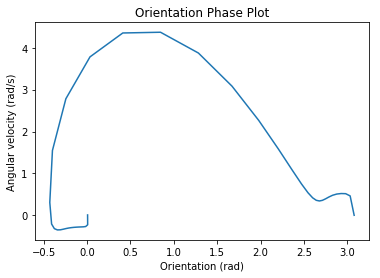

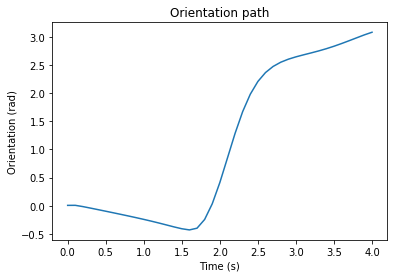

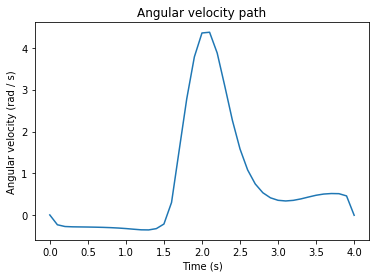

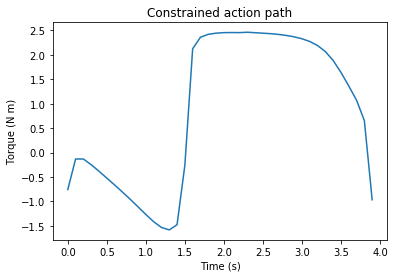

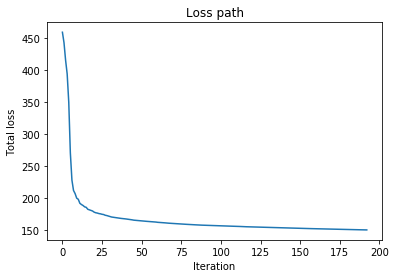

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
env.reset()
for i in range(N):
    z = env.get_state().encode(ENCODING)
    u = controller(z, i, ENCODING)
    env.apply(u)

In [16]:
env.close()